In [ ]:
import gymnasium as gym
import numpy as np
from gymnasium.wrappers import TimeLimit # Add this line
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [3]:
# env = gym.make("FrozenLake-v1", render_mode="human", is_slippery=False)

env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)

In [4]:
state,info = env.reset()

In [5]:
q_table = np.zeros((env.observation_space.n, env.action_space.n))


In [6]:
learning_rate = 0.1
discount_factor = 0.9
exploration_start = 1.0
exploration_decay = 0.9995
min_exploration_rate = 0.1




In [7]:
def epsilon_greedy_action(state, q_table, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit

In [8]:
episodes = 10000

epsilon = exploration_start 
env = TimeLimit(env, max_episode_steps=100)


In [9]:
from  tqdm import tqdm

for episode in tqdm(range(episodes)):
    state, info = env.reset()
    done = False
    total_reward = 0
    
    while not done:
        action = epsilon_greedy_action(state, q_table, epsilon)
        next_state, reward, done, truncated, info = env.step(action)
        
        # Update Q-value
        best_next_action = np.argmax(q_table[next_state])
        td_target = reward + discount_factor * q_table[next_state][best_next_action]
        td_error = td_target - q_table[state][action]
        q_table[state][action] += learning_rate * td_error
        
        state = next_state
        total_reward += reward
    
    # Decay epsilon
    epsilon = max(min_exploration_rate, epsilon * exploration_decay)
    
    if episode % 500 == 0:
        # clear_output(wait=True)
        print(f"Episode {episode}, Total Reward: {total_reward}, Epsilon: {epsilon:.4f}")
print("Training complete!")
print("Final Q-table:")
print(q_table)        

  4%|▎         | 359/10000 [00:00<00:02, 3554.46it/s]

Episode 0, Total Reward: 1.0, Epsilon: 0.9995
Episode 500, Total Reward: 0.0, Epsilon: 0.7784


 15%|█▌        | 1530/10000 [00:00<00:02, 3896.52it/s]

Episode 1000, Total Reward: 0.0, Epsilon: 0.6062
Episode 1500, Total Reward: 1.0, Epsilon: 0.4720


 30%|██▉       | 2974/10000 [00:00<00:01, 4612.06it/s]

Episode 2000, Total Reward: 1.0, Epsilon: 0.3676
Episode 2500, Total Reward: 0.0, Epsilon: 0.2863


 35%|███▍      | 3494/10000 [00:00<00:01, 4783.56it/s]

Episode 3000, Total Reward: 1.0, Epsilon: 0.2229
Episode 3500, Total Reward: 0.0, Epsilon: 0.1736
Episode 4000, Total Reward: 0.0, Epsilon: 0.1352


 51%|█████     | 5123/10000 [00:01<00:00, 5147.74it/s]

Episode 4500, Total Reward: 1.0, Epsilon: 0.1053
Episode 5000, Total Reward: 1.0, Epsilon: 0.1000
Episode 5500, Total Reward: 1.0, Epsilon: 0.1000


 68%|██████▊   | 6843/10000 [00:01<00:00, 5510.81it/s]

Episode 6000, Total Reward: 1.0, Epsilon: 0.1000
Episode 6500, Total Reward: 1.0, Epsilon: 0.1000
Episode 7000, Total Reward: 0.0, Epsilon: 0.1000


 80%|███████▉  | 7962/10000 [00:01<00:00, 4635.79it/s]

Episode 7500, Total Reward: 1.0, Epsilon: 0.1000
Episode 8000, Total Reward: 1.0, Epsilon: 0.1000


 97%|█████████▋| 9657/10000 [00:01<00:00, 5279.90it/s]

Episode 8500, Total Reward: 1.0, Epsilon: 0.1000
Episode 9000, Total Reward: 1.0, Epsilon: 0.1000
Episode 9500, Total Reward: 1.0, Epsilon: 0.1000


100%|██████████| 10000/10000 [00:02<00:00, 4871.19it/s]

Training complete!
Final Q-table:
[[0.531441   0.59049    0.4782969  0.531441  ]
 [0.531441   0.         0.42992564 0.47822735]
 [0.47823391 0.42201375 0.19785242 0.38188783]
 [0.33751259 0.         0.07881201 0.09163392]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.80618635 0.         0.23071718]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.72790056 0.9        0.         0.71353019]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.9        0.729     ]
 [0.81       0.9        1.         0.81      ]
 [0.         0.         0.         0.        ]]


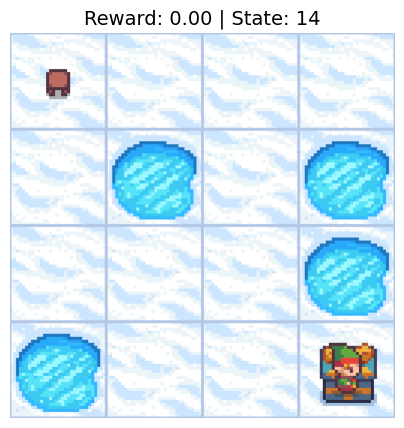

Episode Finished! Total Reward: 1.0


In [10]:


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time # For more precise pausing


state, _ = env.reset()
done = False
total_reward = 0

# Set up matplotlib for animation
fig, ax = plt.subplots(figsize=(5, 5))
# Turn off axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False) # Remove frame around the plot

# Start the animation loop
while not done:
    # Choose action from q_table (exploitation)
    action = np.argmax(q_table[state])

    # Take a step in the environment
    next_state, reward, done, truncated, info = env.step(action)

    # Render the environment as an image array
    # CRITICAL: Ensure your env.render() method returns an RGB or RGBA numpy array
    # when render_mode is set to "rgb_array".
    img = env.render() 
    
    # Update the plot
    ax.clear()  # Clear the previous image
    ax.imshow(img)
    ax.set_title(f"Reward: {total_reward:.2f} | State: {state}", fontsize=14)
    plt.axis('off') # Hide axis labels and ticks for cleaner image

    # Display and pause for animation effect
    clear_output(wait=True) # Clear previous cell output
    display(fig) # Display the updated figure
    time.sleep(0.1) # Pause for a short duration (e.g., 0.1 seconds)

    total_reward += reward
    state = next_state

    # Combine done and truncated for episode termination
    done = done or truncated

print(f"Episode Finished! Total Reward: {total_reward}")
plt.close(fig) # Close the figure after the loop finishes
env.close() # Close the environment, releasing resources